<a href="https://colab.research.google.com/github/eduneris71/Unifil_Mineracao_Visualizacao/blob/main/AI_5_MIn_Dados_Eduardo_N_Marques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Carregamento dos pacotes em Phyton
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Pacote para pré-rocessamento de dados
from sklearn.preprocessing import StandardScaler


#Pacote para clusterização de dados
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


#Montagem do drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Carregamento dos dados de qualidade do vinho diretamente da UCI (descomentar essa parte)
# fetch dataset
#wine_quality = fetch_ucirepo(id=186)

# dados (pandas dataframes)
#X = wine_quality.data.features
#y = wine_quality.data.targets



# ---------------------------
# Leitura do dataset por meio de arquivo CSV baixado previamente, caso não funcione o carregamento direto do dataset
# # ---------------------------
df_red_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unifil/Mineracao_Visualizacao_Dados/winequality-red.csv', sep=';')
df_red_white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unifil/Mineracao_Visualizacao_Dados/winequality-white.csv', sep=';')

# Agrupar os dados de vinho tinto e vinho branco
wine_quality = pd.concat([df_red_wine, df_red_white], ignore_index=True)
X= wine_quality.drop(columns=['quality'])
y= wine_quality['quality']


In [45]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [46]:
y.head(5)

,quality
0,5
1,5
2,5
3,6
4,5


3 - Análise e Resultados

Nessa parte será realizada a análise exploratória do conjuntos de dados e serão realizadas as transformações necessárias para adequa-lo como conjunto de entrada para os algorítimos posteriores de clusterização e de categorização  

In [47]:
### Início da Análise exploratória dos dados

# Verificando os dados no dataframe
wine_data = pd.concat([X, y],axis=1) # concatenar dados para pre processamento
# Primeiras linhas
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [48]:
# Informações gerais sobre os dados
wine_data.info()
#ausencia de valores nulos
#Atributos numéricos do tipo float64 e int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [49]:
# Estatísticas descritivas dos dados
wine_data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [50]:
# Verificar balanceamento da variável de saída (qualidade)
print(wine_data["quality"].value_counts())
#Dados desbalanceados

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [51]:
wine_data["quality"].describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


In [52]:
#Verificar dados duplicados
duplicated_mask = wine_data.duplicated(keep='first')
# Mantém apenas os registros NÃO duplicados
wine_data_cleaned = wine_data[~duplicated_mask]


In [53]:
#Verificação de instancias únicas
wine_data_cleaned.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [54]:
#Atributos verificados, limpos e sem duplicidades
wine_data_cleaned.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


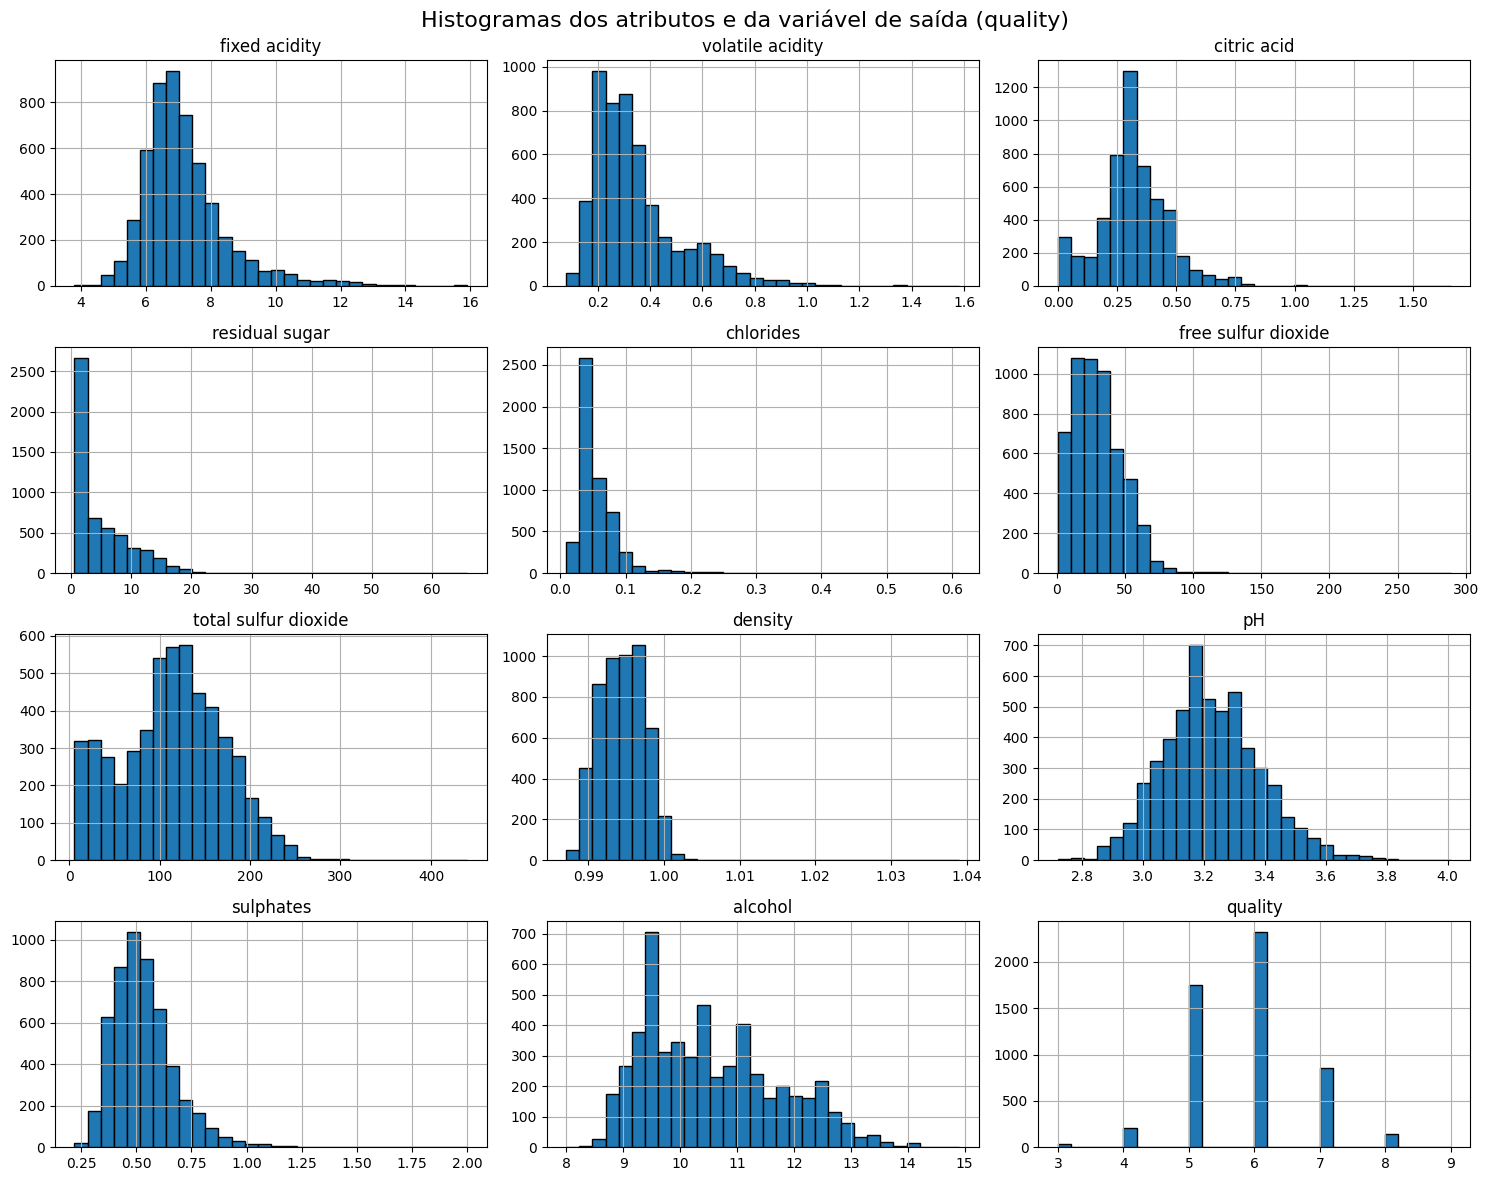

In [55]:
#Verificar a distribuição das variáveis e procurar por outliers

wine_data_cleaned.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle("Histogramas dos atributos e da variável de saída (quality)", fontsize=16)
plt.tight_layout()
plt.show()
###De modo geral os atributos estão normalmente distribuídos, com exceção de "residual sugar" e "density".
#Atributos de qualidade normalmente distribuídos, com exceção de 3 e 8.

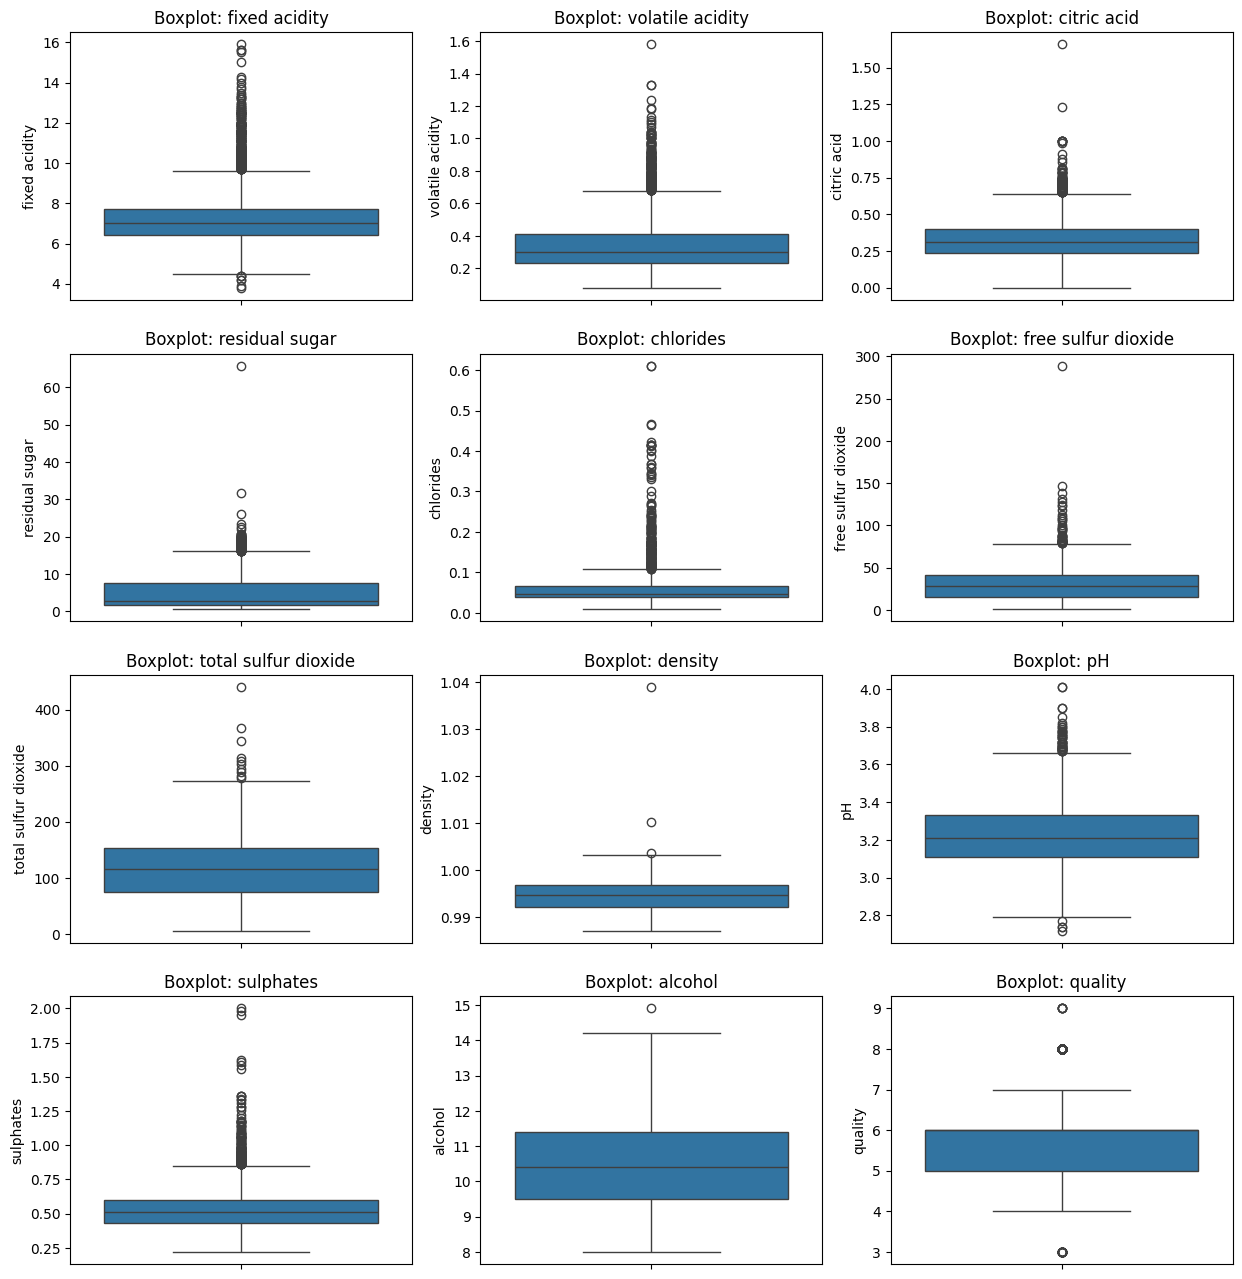

In [56]:
#Procura por outliers
#Verificar a distribuição de todos os atributos do dataset
# Excluímos colunas não numéricas (se houver)
df = wine_data_cleaned.select_dtypes(include='number')

# Número de colunas do DataFrame
num_cols = df.shape[1]

# Número de gráficos por linha
cols_per_row = 3

# Número de linhas necessárias
num_rows = math.ceil(num_cols / cols_per_row)

# Criar subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
axes = axes.flatten()  # Facilita iteração

# Plotar cada coluna
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot: {column}')

# Desligar gráficos extras se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])



In [57]:
#Verificou-se uma grande quantidade de outliers em algumas variaveis e procurou-se verificar a redução que haveria no dataset se houvesse
# a remoção de todos os outliers

def remove_outliers_iqr(df):
    df_clean = df.copy()
    for col in df_clean.select_dtypes(include='number').columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


wine_data_cleaned_outliers=remove_outliers_iqr(wine_data_cleaned)
taxa_remocao_outliers = (1-len(wine_data_cleaned_outliers)/len(wine_data_cleaned))*100
print("A taxa de remoção de outliers é:",f"{taxa_remocao_outliers:.2f}", "%")

#Dado que se fosse implementado a remoção de outliers, a taxa de remoção seria de 31% o que poderia comprometer a análise.
# Optou-se por não removê-los e buscar modelos que lidam bem com outliers na distribuição dos dados


A taxa de remoção de outliers é: 31.01 %


In [58]:
#Separação dos dados em variáveis independentes e dependentes
X_cleaned = wine_data_cleaned.drop("quality", axis=1)
y_cleaned = wine_data_cleaned["quality"]


In [59]:
#Normalizar os dados para que todos os atributos tenham a mesma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)  # Normaliza os dados



In [60]:
# Converter o resultado de volta para um DataFrame do pandas
X_scaled = pd.DataFrame(X_scaled, columns=X_cleaned.columns, index=X_cleaned.index)

In [61]:
# Verificar a normalização
X_scaled.iloc[:,0:6].describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
count,5318.00,5318.00,5318.00,5318.00,5318.00,5318.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.59,-1.57,-2.16,-0.99,-1.29,-1.63
25%,-0.62,-0.68,-0.53,-0.72,-0.51,-0.79
50%,-0.16,-0.26,-0.06,-0.52,-0.26,-0.11
75%,0.37,0.39,0.55,0.54,0.25,0.62
max,6.58,7.35,9.12,13.50,15.04,14.55


In [62]:
X_scaled.iloc[:,6:11].describe().round(2)

,total sulfur dioxide,density,pH,sulphates,alcohol
count,5318.00,5318.00,5318.00,5318.00,5318.00
mean,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.90,-2.50,-3.15,-2.09,-2.15
25%,-0.71,-0.79,-0.71,-0.69,-0.88
50%,0.03,0.04,-0.09,-0.16,-0.13
75%,0.70,0.75,0.66,0.44,0.72
max,5.74,14.99,4.90,9.79,3.67


In [63]:
# Redução de dimensionalidade para 2D apenas para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [64]:
# Loadings (contribuição de cada variável em cada componente)
loadings = pd.DataFrame(pca.components_.T, columns=["PCA1", "PCA2"], index=X.columns)

# Ordenar por contribuição no PCA1 (ou PCA2)
print(loadings.sort_values(by="PCA1", key=abs, ascending=False))

                          PCA1      PCA2
total sulfur dioxide  0.476368  0.161735
free sulfur dioxide   0.425837  0.140944
volatile acidity     -0.389617  0.069878
chlorides            -0.319359  0.275088
sulphates            -0.317415  0.158014
residual sugar        0.297962  0.367698
fixed acidity        -0.274551  0.306882
pH                   -0.188145 -0.187072
density              -0.136120  0.565252
citric acid           0.134321  0.219160
alcohol              -0.032604 -0.465335


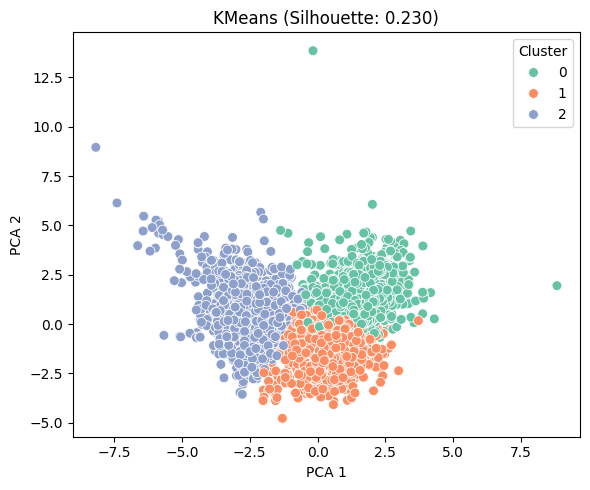

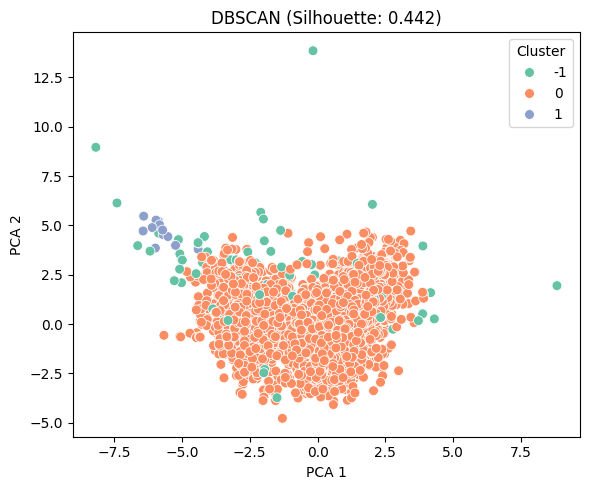

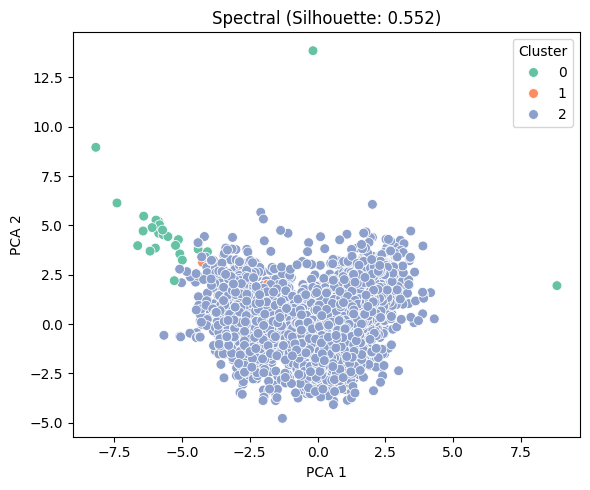

In [65]:
# Dicionário de modelos
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=2.3, min_samples=5),  # ajuste pode ser necessário
    "Spectral": SpectralClustering(n_clusters=3, assign_labels='cluster_qr', random_state=42),

}

# Armazenar resultados
res = {}

for name, model in models.items():
    cluster_labels = model.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    res[name] = {
        "labels": cluster_labels,
        "silhouette": sil_score
    }

    # Visualização
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set2", s=50)
    plt.title(f"{name} (Silhouette: {sil_score:.3f})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Cluster", loc="best")
    plt.tight_layout()
    plt.show()


In [66]:
#Verifica-se que os três algorítimos de clusterização Kmeans, DBCSCAN e Spectral não apresentaram o indice de silhouette acima de 0,6, o qual indicaria uma boa separação em clusters.
# Com indices baixos conclui-se que não foi encontrada uma boa separação entre os clusters.
#Há possibilidade de pesquisar outros modelos de clusterização, no entanto iremos partir para algorítimo de classificação supervisionada usando os algorítimos de
# 1 - Random Forest,
# 2 - Regressão Logistica,

In [67]:
# Classificação da variavel target em 3 categorias: ruim (0–4), média (5–6), boa (7+)
def categorizar_qualidade(q):
    if q <= 4:
        return "ruim"
    elif q <= 6:
        return "média"
    else:
        return "boa"

wine_data["quality_class"] = wine_data["quality"].apply(categorizar_qualidade)


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Modelos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [69]:
#Separar features e target
X = wine_data.drop(columns=["quality", "quality_class"])
y = wine_data["quality_class"]

#Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 5. Divisão treino/teste ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

#Definição dos modelos
modelos = {
    "Logistic Regression": LogisticRegression(penalty='l2',
    C=1,
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=150,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True, class_weight='balanced', random_state=42),
}

#Treinamento e avaliação
for nome, modelo in modelos.items():
    print(f"\nModelo: {nome}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acc:.3f}")

    relatorio = classification_report(y_test, y_pred, digits=3,zero_division=0)
    print("Relatório de Classificação:")
    print(relatorio)


Modelo: Logistic Regression
Acurácia: 0.745
Relatório de Classificação:
              precision    recall  f1-score   support

         boa      0.464     0.527     0.494       256
       média      0.836     0.834     0.835       995
        ruim      0.188     0.061     0.092        49

    accuracy                          0.745      1300
   macro avg      0.496     0.474     0.474      1300
weighted avg      0.738     0.745     0.740      1300


Modelo: Random Forest
Acurácia: 0.849
Relatório de Classificação:
              precision    recall  f1-score   support

         boa      0.802     0.555     0.656       256
       média      0.857     0.964     0.907       995
        ruim      0.750     0.061     0.113        49

    accuracy                          0.849      1300
   macro avg      0.803     0.527     0.559      1300
weighted avg      0.842     0.849     0.828      1300



In [70]:
# Pós processamento e conclusão
# Pelos resultados de acurácia e o relatório de classificação, o modelo de Random Forest se destacou com uma acurácia de 0.85 (85%)
# o que pode ser considerado um bom resultado. Os resultados de precision foram muito bons (acima de 0,75) mesmo para uma classe com poucos
# dados ( foi usado class_weight='balanced' como hiperparãmetro para contornar os poucos dados da classe "ruim") e um bom equilíbrio entre precisão e recall
# para  as classes "boa" e "média". Para a classe "ruim, ambos os modelos tiveram baixo indice de acerto (6,1%) quando a classe se tratava de "ruim"
# o que pode ser considerado um resultado ruim, mas esperado, já que a classe "ruim" tem poucos dados (apenas 4% do total de dados de teste).
# Em um cenário real, o modelo de Random Forest poderia ser usado para prever a qualidade do vinho com uma boa precisão, mas com a ressalva de que a classe
# "ruim" pode não ser tão confiável devido à falta de dados.
# Para melhorar o modelo, poderia-se considerar a coleta de mais dados para a classe "ruim".
# Outra abordagem que pode ser realizada é alterar a classificação dos vinhos para duas classes apenas tornando uma classe binária (ruim e boa) e assim
# incorporando a classe "ruim" na classe "média"
# Quanto aos resultados de clusterização para os dados, os índices de silhouette foram baixos, indicando que os dados não apresentaram uma boa separação
# entre os clusters.
# Isso pode ser devido à natureza dos dados ou à escolha do número de clusters.
# Outras abordagens de clusterização poderiam ser testadas, como o uso de diferentes algoritmos ou a escolha de um número diferente de clusters.
# Além disso, a clusterização pode não ser a melhor abordagem para este conjunto de dados, considerando que o foco principal é a classificação da
# qualidade do vinho.

##Referências Bibliográficas

Apostila da disciplina de Mineração de Dados, UNIFIL, 2025, acesso em 31/03/2025.

Base de dados de Qualidade de Vinhos, UCI Machine Learning Repository, Disponível em: https://archive.ics.uci.edu/dataset/186/wine+quality , acesso em 31/03/2025.

Biblioteca DBSCAN, Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html acesso em 31/03/2025.

Biblioteca K-Means,. Disponível em https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html , acesso em 31/03/2025

Biblioteca Logistic Regression, Disponível em https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression, acesso em 31/03/2025

Biblioteca Randon Forest Classifier, Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier , acesso em 31/03/2025.

Biblioteca Spectral Clustering, Dispoivel em https://scikit-learn.org/stable/modules/generated/sklearn.cluster.spectral_clustering.html#sklearn.cluster.spectral_clustering acesso em 31/03/2025.

HAN, Jiawei; KAMBER, Micheline; PEI, Jian. Data Mining: Concepts and Techniques. 3. ed. San Francisco: Morgan Kaufmann, 2011. Disponível em: http://hanj.cs.illinois.edu/bk3/ . Acesso em: 31/03/2025.




